In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_info = pd.read_csv("TensorFlow_FILES\\DATA\\lending_club_info.csv",index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
feat_info('mort_acc')

Number of mortgage accounts.


In [5]:
df = pd.read_csv("TensorFlow_FILES\\DATA\\lending_club_loan_two.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe().T
##LETS REVIEW THE DATA AND START APPLYING FEATURE ENGINEERING:

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


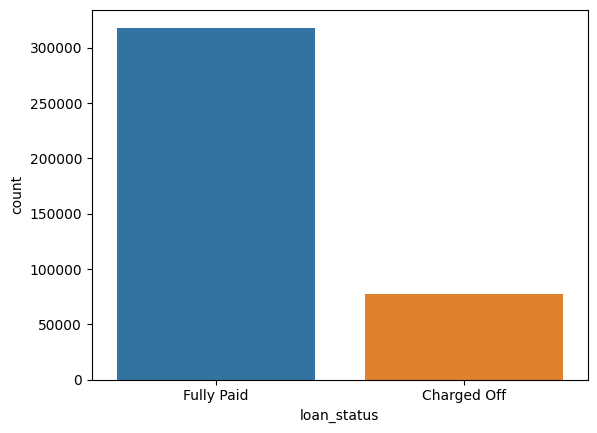

In [7]:
sns.countplot(x='loan_status',data=df);

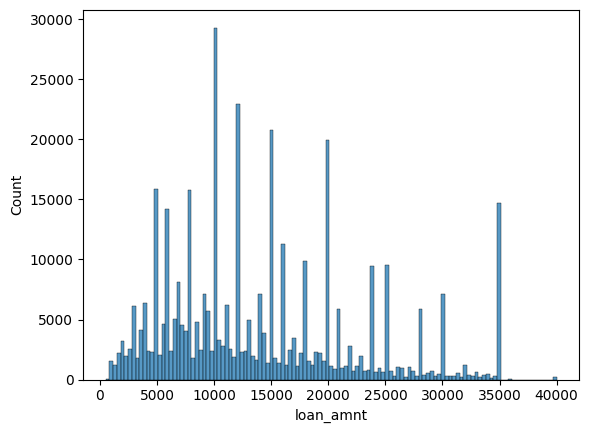

In [8]:
sns.histplot(df['loan_amnt']);

In [9]:
df.corr()

C:\Users\Mau\AppData\Local\Temp\ipykernel_14424\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\Mau\AppData\Local\Temp\ipykernel_14424\3199758246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<AxesSubplot: >

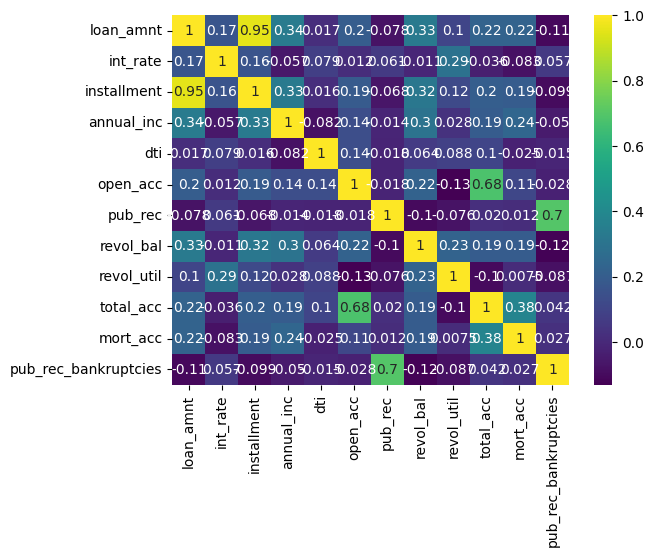

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
#WHAT IS INSTALLMENT?
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


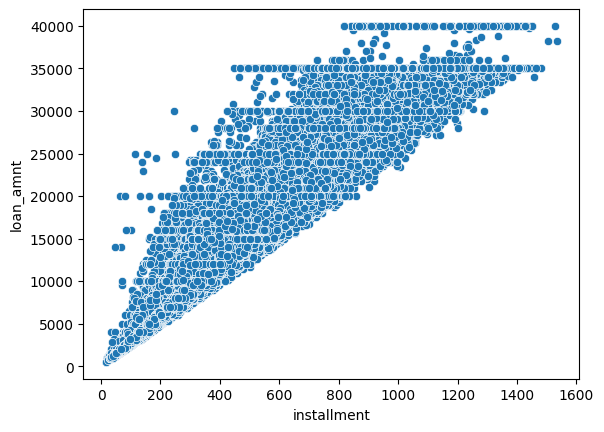

In [12]:
sns.scatterplot(x='installment',y='loan_amnt',data=df);
#here we se a high correlation but not linear... likely installment is some kind of a product of the loan amount

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

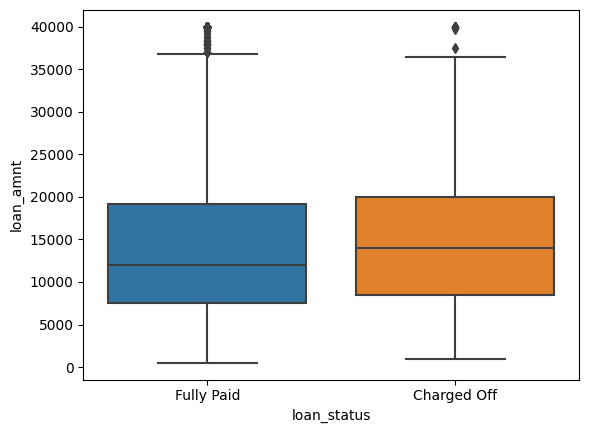

In [13]:
sns.boxplot(x='loan_status', y='loan_amnt',data=df)

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()
#what this means is that the average loan amount is slightly higher for the unpaid than from the fully paid ones

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

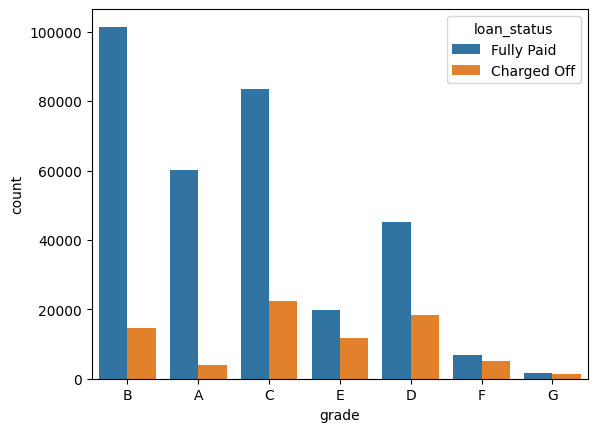

In [17]:
sns.countplot(x='grade',data=df,hue='loan_status');

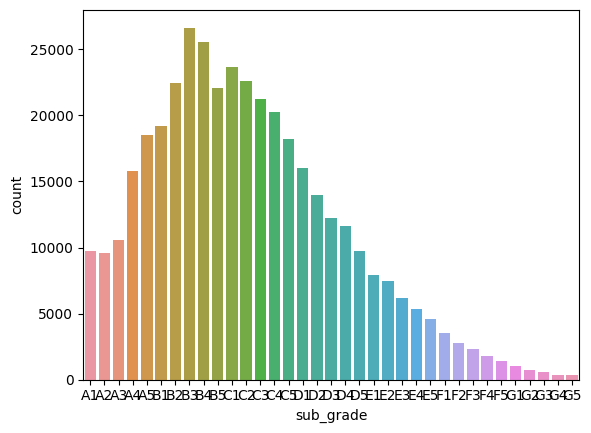

In [18]:
subgradeorder=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgradeorder);

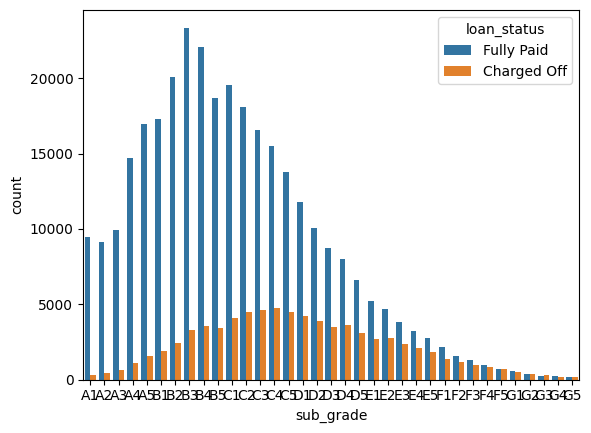

In [19]:
sns.countplot(x='sub_grade',data=df,order=subgradeorder,hue='loan_status');

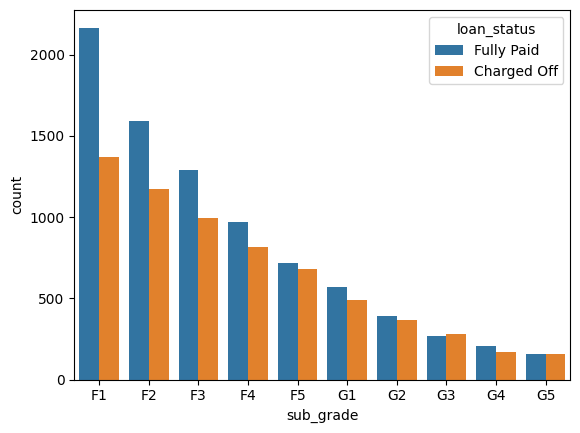

In [20]:
f_and_g=df[(df['grade']=='G')|(df['grade']=='F')]
subgradeorder=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgradeorder,hue='loan_status');

In [21]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


C:\Users\Mau\AppData\Local\Temp\ipykernel_14424\3279559418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar');


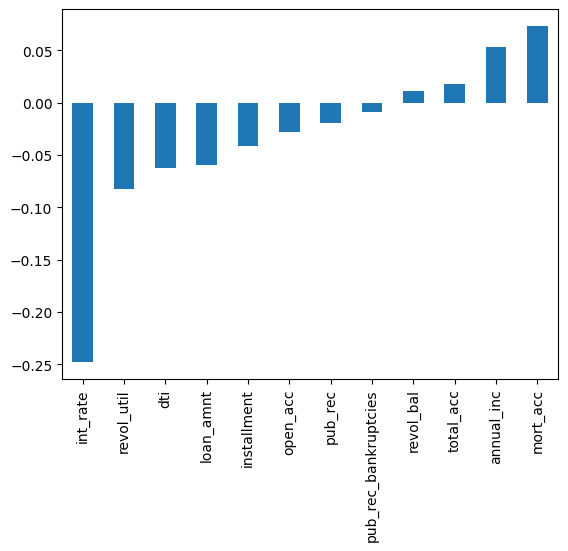

In [22]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar');

In [23]:
#HOW SIGNIFICANT AND WHAT DO THE NaNS MEAN?
#lets crunch and feature engineer them out
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [24]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [25]:
df['emp_title'].nunique()
#maaany unique employment titles....

173105

In [26]:
df['emp_title'].value_counts()
#definetely not worth converting into dummy (boolean) columns...

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [27]:
#unlikely to mean anything. Better just drop the whole column. 
df=df.drop('emp_title',axis=1)

In [28]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

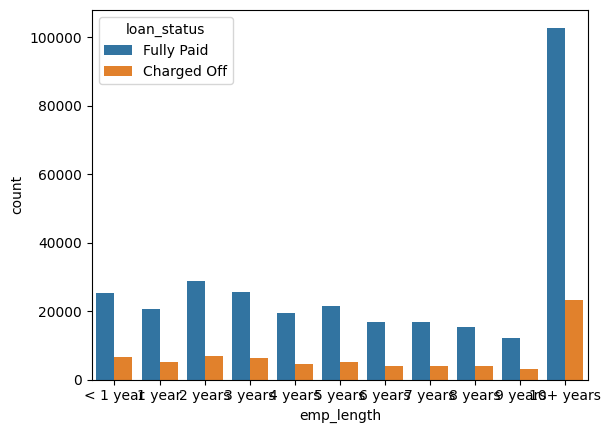

In [29]:
emplenghtorder = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
  '10+ years' ]
sns.countplot(x='emp_length',data=df,order=emplenghtorder,hue='loan_status');

In [30]:
empco= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [31]:

empfp= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [32]:
empco/empfp*100

emp_length
1 year       24.864917
10+ years    22.576975
2 years      23.955991
3 years      24.259310
4 years      23.821340
5 years      23.791057
6 years      23.334122
7 years      24.188738
8 years      24.962514
9 years      25.073505
< 1 year     26.082982
Name: loan_status, dtype: float64

In [33]:
#the percent ratios are pretty close by... =length of employment is mostly irrelevant
# #& we have 4% missing data: 
df=df.drop('emp_length',axis=1)

In [34]:
df=df.drop('title',axis=1)

In [35]:
print(df['mort_acc'].isna().sum())
print(df['mort_acc'].value_counts())
#too many NaNs...

37795
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64


In [36]:
#lets find the acc mort's correlation to other variables:
df.corr()['mort_acc'].sort_values()

C:\Users\Mau\AppData\Local\Temp\ipykernel_14424\321074987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [37]:
#apparently the total_acc has a meaningful enough correlation to mort_acc... so:
totalaccavg=df.groupby('total_acc').mean()['mort_acc']
totalaccavg

C:\Users\Mau\AppData\Local\Temp\ipykernel_14424\3133989045.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalaccavg=df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [38]:
def fillmortacc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return totalaccavg[total_acc]
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fillmortacc(x['total_acc'],x['mort_acc']),axis=1)

In [39]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [40]:
#so little records with NaNs left, might as well drop'empc
df=df.dropna()

In [41]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [42]:
##NOW LETS FOCUS ON THE CATEGORICAL FEATURES:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [43]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [44]:
#best option: convert into numbers by keeping the numeric part of the string:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [45]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [46]:
df=df.drop('grade',axis=1)
#this is data leakage, so drop:
df=df.drop('issue_d',axis=1)

In [47]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [48]:
dummies = pd.get_dummies(df[['verification_status', 'purpose', 'initial_list_status', 'application_type']],drop_first=True)
df=pd.concat([df.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type'],axis=1),dummies],axis=1)

In [49]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [50]:
#might as well move "none" & "any" to "other"...
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [51]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [52]:
#now for the Address... lets extract the zip code
df['zip']=df['address'].apply(lambda address:address[-5:])
df['zip'].value_counts()


70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip, dtype: int64

In [53]:
#NOT that many, so...
dummies = pd.get_dummies(df['zip'],drop_first=True)
df=pd.concat([df.drop('zip',axis=1),dummies],axis=1)
df=df.drop('address',axis=1)
df=df.drop('loan_status',axis=1)

In [54]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [55]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [56]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

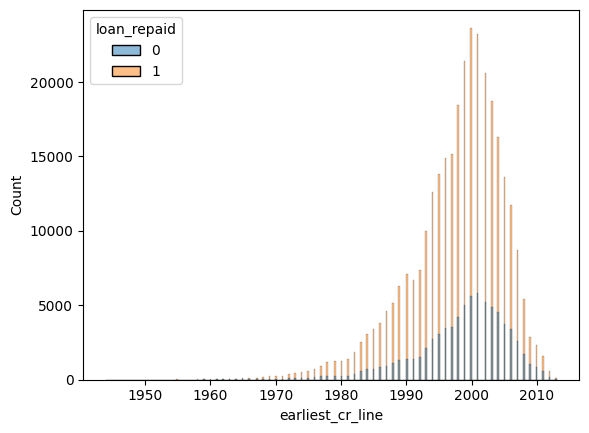

In [57]:
sns.histplot(x='earliest_cr_line',data=df,hue='loan_repaid');
#earliest is NOT a linear correlation per-se, teacher is keeping it, I am DROPPING IT, let us see wat happens...

In [58]:
df=df.drop('earliest_cr_line',axis=1)

In [59]:
### NOW LET US TRAIN THE MODEL
from sklearn.model_selection import train_test_split

In [60]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [62]:
#NORMALIZE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
#CREATE THE MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [64]:
model=Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [65]:
model.fit(x=X_train,y=y_train,epochs=25,
          #batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
9881/9881 [==============================] - 11s 1ms/step - loss: 0.2764 - val_loss: 0.2647
Epoch 2/25
9881/9881 [==============================] - 10s 974us/step - loss: 0.2628 - val_loss: 0.2636
Epoch 3/25
9881/9881 [==============================] - 9s 954us/step - loss: 0.2616 - val_loss: 0.2628
Epoch 4/25
9881/9881 [==============================] - 10s 1ms/step - loss: 0.2615 - val_loss: 0.2626
Epoch 5/25
9881/9881 [==============================] - 11s 1ms/step - loss: 0.2607 - val_loss: 0.2625
Epoch 6/25
9881/9881 [==============================] - 10s 1ms/step - loss: 0.2605 - val_loss: 0.2630
Epoch 7/25
9881/9881 [==============================] - 9s 939us/step - loss: 0.2604 - val_loss: 0.2622
Epoch 8/25
9881/9881 [==============================] - 10s 1ms/step - loss: 0.2601 - val_loss: 0.2620
Epoch 9/25
9881/9881 [==============================] - 9s 944us/step - loss: 0.2599 - val_loss: 0.2618
Epoch 10/25
9881/9881 [==============================] - 10s 1ms/ste

<AxesSubplot: >

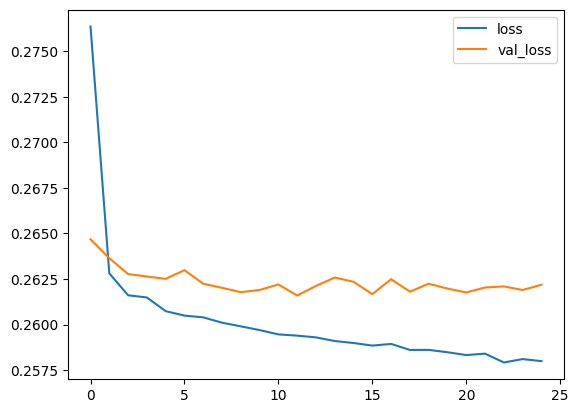

In [66]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 1s 519us/step


In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [70]:
print(confusion_matrix(y_test,predictions))

[[ 6788  8870]
 [   57 63329]]


In [71]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 77, dtype: float64

In [80]:
model.predict(new_customer.astype("int32").values.reshape(1,77))

1/1 [==============================] - 0s 54ms/step


array([[1.]], dtype=float32)

In [81]:
df.iloc[random_ind]['loan_repaid']

1.0